In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import json
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/casos_covid19_25julho2020.csv"

# Carregando dados do Coronoavírus

In [3]:
data_df = pd.read_csv(PATH)
data_df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
# Agrupando pelo último dia da semana epidemiológica
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["epi_week", "state"]).last()
aux_df.reset_index(inplace=True)

In [5]:
aux_df

,epi_week,state,date,country,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
0,9,SP,2020-02-29,Brazil,TOTAL,0,0,0,2,0,2,0.00000,0.00436,0.00000,NaN,NaN,NaN,NaN,Sudeste
1,10,BA,2020-03-07,Brazil,TOTAL,0,0,1,2,0,2,0.00000,0.01345,0.00000,NaN,NaN,NaN,NaN,Nordeste
2,10,DF,2020-03-07,Brazil,TOTAL,0,0,1,1,0,1,0.00000,0.03316,0.00000,NaN,NaN,NaN,NaN,DF
3,10,ES,2020-03-07,Brazil,TOTAL,0,0,0,1,0,1,0.00000,0.02488,0.00000,NaN,NaN,NaN,NaN,Sudeste
4,10,RJ,2020-03-07,Brazil,TOTAL,0,0,0,2,0,2,0.00000,0.01158,0.00000,NaN,NaN,NaN,NaN,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,26,RS,2020-06-25,Brazil,TOTAL,0,500,1051,23060,500,22009,4.39474,202.68538,0.02168,18446.0,2167.0,113189.0,994.87231,Sul
423,26,SC,2020-06-25,Brazil,TOTAL,10,289,1030,21951,279,20921,4.03362,306.37334,0.01317,16377.0,4810.0,75204.0,1049.63329,Sul
424,26,SE,2020-06-25,Brazil,TOTAL,0,524,728,21081,524,20353,22.79553,917.08516,0.02486,7579.0,11886.0,41589.0,1809.24315,Nordeste
425,26,SP,2020-06-25,Brazil,TOTAL,407,13759,9765,248587,13352,238822,29.96360,541.35921,0.05535,49295.0,257900.0,602384.0,1311.83901,Sudeste


In [6]:
aux_df.columns

Index(['epi_week', 'state', 'date', 'country', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'region'],
      dtype='object')

In [7]:
# Filtrando colunas desejadas
estados_df = aux_df[["epi_week", "state", "totalCases", "deaths", "tests", "suspects", "recovered", "region"]]
estados_df.set_index(["state"], inplace=True)

In [8]:
estados_df.tail()

,epi_week,totalCases,deaths,tests,suspects,recovered,region
state,,,,,,,
RS,26,23060,500,113189.0,2167.0,18446.0,Sul
SC,26,21951,289,75204.0,4810.0,16377.0,Sul
SE,26,21081,524,41589.0,11886.0,7579.0,Nordeste
SP,26,248587,13759,602384.0,257900.0,49295.0,Sudeste
TO,26,9425,183,17811.0,768.0,5670.0,Norte


In [9]:
# Renomenando siglas para nome do estado
with open("../dados/siglas_estados.json", "r") as f:
    estado2sigla = json.load(f)
sigla2estado = {sigla: estado for estado, sigla in estado2sigla.items()}
estados_df.rename(sigla2estado, inplace=True)

In [10]:
estados_df.tail()

,epi_week,totalCases,deaths,tests,suspects,recovered,region
state,,,,,,,
Rio Grande do Sul,26,23060,500,113189.0,2167.0,18446.0,Sul
Santa Catarina,26,21951,289,75204.0,4810.0,16377.0,Sul
Sergipe,26,21081,524,41589.0,11886.0,7579.0,Nordeste
São Paulo,26,248587,13759,602384.0,257900.0,49295.0,Sudeste
Tocantins,26,9425,183,17811.0,768.0,5670.0,Norte


# Carregando demais dados

In [11]:
censo_df = pd.read_excel("../dados/processados/brasil_demografia_censo2010.xlsx")
censo_df.columns = ["uf", "rural", "urbana", "total"]
censo_df.set_index("uf", inplace=True)

In [12]:
economia_df = pd.read_excel("../dados/processados/economia_atlas2013.xlsx")
economia_df.set_index("UFN", inplace=True)

In [13]:
idade_df = pd.read_excel("../dados/processados/espectativa_de_vida_atlas2013.xlsx")
idade_df.set_index("UFN", inplace=True)

# Combinando tabelas

In [14]:
data_df = estados_df.join(censo_df)
data_df = data_df.join(economia_df)
data_df = data_df.join(idade_df)

In [15]:
data_df.reset_index(inplace=True)
data_df.set_index("epi_week", inplace=True)
data_df.sort_index(inplace=True)

In [16]:
data_df.tail()

,index,totalCases,deaths,tests,suspects,recovered,region,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65
epi_week,,,,,,,,,,,,,,,,,,,
26,Sergipe,21081,524,41589.0,11886.0,7579.0,Nordeste,547651,1520366,2068017,27.89,52.13,523.53,931144,51.28,1510131,1385063,1107839,126888
26,Pernambuco,55136,4488,99920.0,7970.0,36710.0,Nordeste,1744238,7052210,8796448,27.17,51.86,525.64,3843266,52.57,6532393,6038351,4902899,648719
26,Alagoas,32065,938,63310.0,3774.0,23185.0,Nordeste,822634,2297860,3120494,34.29,59.76,432.56,1261201,51.76,2207366,2012326,1605052,187531
26,Amapá,27415,387,46765.0,5231.0,10544.0,Norte,68490,601036,669526,24.07,45.22,598.98,297107,47.44,446905,401576,305300,23052
26,Tocantins,9425,183,17811.0,768.0,5670.0,Norte,293339,1090106,1383445,22.15,44.71,586.62,632410,49.03,984639,899153,713646,80564


# Analisando correlações ao longo das semanas epidemiológicas

In [17]:
data_df.loc[10]

,index,totalCases,deaths,tests,suspects,recovered,region,rural,urbana,total,pctPobreza,vulnProbreza,rendaPerCapta,PEA,concRiqueza,A15,A18,A25,A65
epi_week,,,,,,,,,,,,,,,,,,,
10,Distrito Federal,1,0,NaN,NaN,NaN,DF,87950,2482210,2570160,4.93,16.00,1715.11,1408410,49.26,1961144,1829600,1494808,127625
10,Bahia,2,0,NaN,NaN,NaN,Nordeste,3914430,10102476,14016906,28.72,52.71,496.73,6581418,51.05,10417051,9597387,7787985,1013309
10,São Paulo,13,0,NaN,NaN,NaN,Sudeste,1676948,39585251,41262199,4.66,16.13,1084.46,21723910,46.87,32310780,30323379,25391883,3228313
10,Rio de Janeiro,2,0,NaN,NaN,NaN,Sudeste,525690,15464239,15989929,7.23,22.26,1039.30,7852543,49.33,12586696,11814446,10017473,1425430
10,Espírito Santo,1,0,NaN,NaN,NaN,Sudeste,583480,2931472,3514952,9.53,26.82,815.43,1832872,45.87,2693846,2511810,2071379,248796


In [18]:
data_df.index.unique()

Int64Index([9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
            26],
           dtype='int64', name='epi_week')

In [19]:
weeks = data_df.index.unique()

casos_corr_df = pd.DataFrame()
obitos_corr_df = pd.DataFrame()

for week in weeks:
    if week == 9: continue
    correlation = data_df.loc[week].corr()
    casos_corr_df = casos_corr_df.append(correlation["totalCases"])
    obitos_corr_df = obitos_corr_df.append(correlation["deaths"])

In [20]:
casos_corr_df["week"] = obitos_corr_df["week"] = weeks[1:]

In [21]:
casos_corr_df.set_index("week", inplace=True)
obitos_corr_df.set_index("week", inplace=True)

In [22]:
obitos_corr_df

,A15,A18,A25,A65,PEA,concRiqueza,deaths,pctPobreza,recovered,rendaPerCapta,rural,suspects,tests,total,totalCases,urbana,vulnProbreza
week,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,0.850443,0.852937,0.855769,0.833715,0.856801,-0.071584,1.0,-0.305456,NaN,0.311229,0.093459,NaN,NaN,0.844728,0.948209,0.882108,-0.324363
13,0.855083,0.857353,0.859605,0.837154,0.861376,-0.067549,1.0,-0.294195,-0.250632,0.295592,0.118818,0.478924,NaN,0.850031,0.940026,0.884643,-0.312709
14,0.868106,0.870311,0.872670,0.852667,0.872653,-0.057338,1.0,-0.305389,-0.302501,0.317136,0.129002,0.209666,NaN,0.863040,0.988843,0.897167,-0.324460
15,0.875479,0.877298,0.879050,0.861098,0.876248,-0.011123,1.0,-0.276812,0.017860,0.294635,0.159288,0.433186,NaN,0.871850,0.992682,0.902814,-0.295612
16,0.864345,0.865936,0.867616,0.854139,0.860235,0.048599,1.0,-0.254894,0.907401,0.279429,0.161893,0.440086,NaN,0.861506,0.991449,0.891559,-0.270676
17,0.859328,0.860661,0.861688,0.846968,0.854129,0.071360,1.0,-0.222977,0.598720,0.250779,0.180697,0.570719,NaN,0.857615,0.992860,0.885163,-0.239039
18,0.849608,0.850500,0.850612,0.835204,0.842205,0.101511,1.0,-0.182889,0.453293,0.217479,0.210656,0.607566,0.570318,0.849644,0.995403,0.873100,-0.199775


# Visualizando evolução da correlação

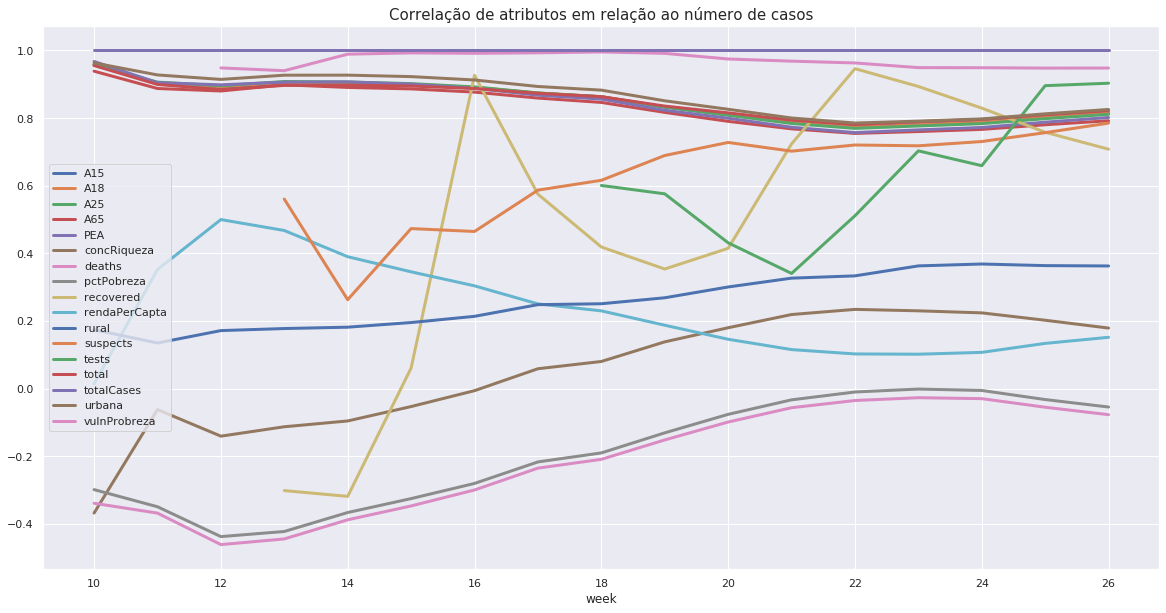

In [23]:
_ = casos_corr_df.plot(linewidth=3).set_title("Correlação de atributos em relação ao número de casos", size=15)

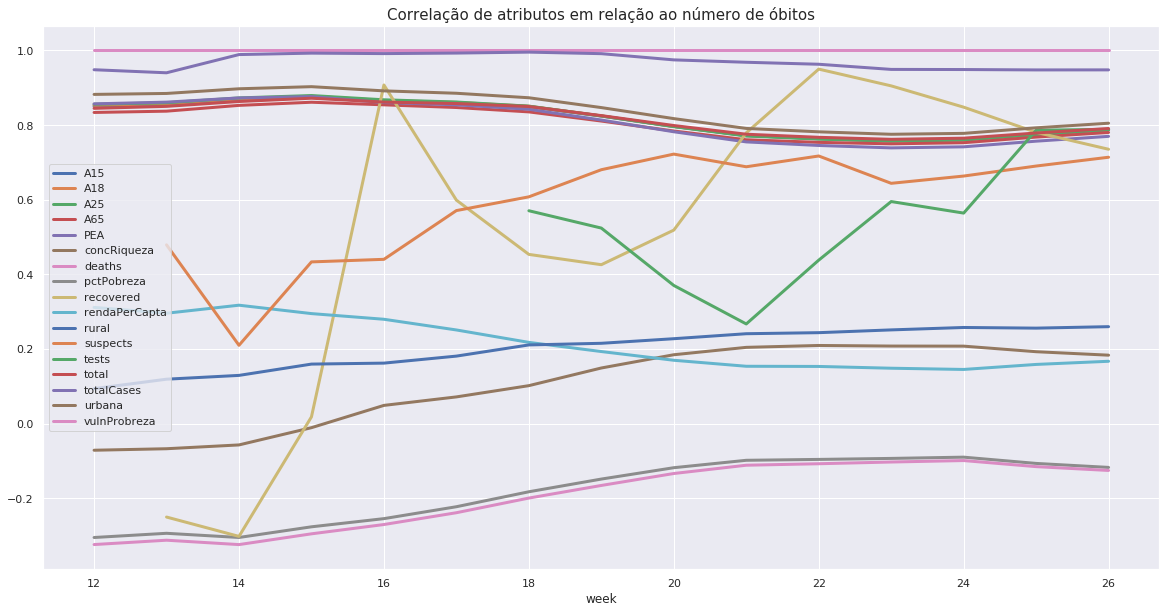

In [24]:
_ = obitos_corr_df.plot(linewidth=3).set_title("Correlação de atributos em relação ao número de óbitos", size=15)